# BMW Sales Report EDA -----

In [21]:
# Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Importing the DataSet

df = pd.read_csv('/content/BMW sales data (2010-2024) (1).csv')
# As mentioned Data set from 2010 to 2024

df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [8]:
df.shape

(50000, 11)

The DataSet has 50k rows with 11 columns

In [9]:
# Lets check if this data has any Missing Values

df.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


This Data set has no Missing Values --

Now lets focus on EDA

In [11]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [13]:
# Lets Understand which region has highest sales for BMW

df['Region'].unique()


array(['Asia', 'North America', 'Middle East', 'South America', 'Europe',
       'Africa'], dtype=object)

In [24]:
region_values = df.Region.value_counts().values
region_index = df.Region.value_counts().index

Text(0.5, 1.0, 'Region')

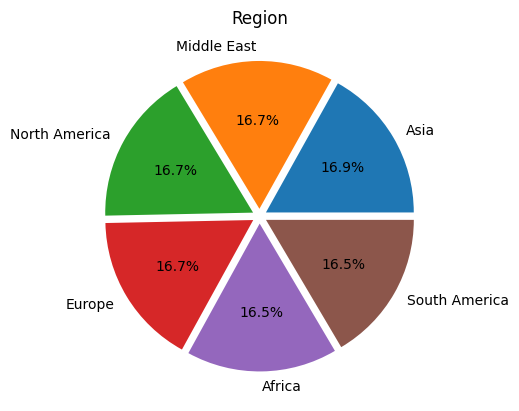

In [30]:
# Lets plot a Pie Chart for Region
my_explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

plt.pie(region_values, labels=region_index, explode = my_explode, autopct='%1.1f%%')
plt.title('Region')

Observation:

The sales of BMW are almost equal across all the Regions

In [47]:
# Lets Check which Fuel type has most Sales
f_t = df.groupby(['Fuel_Type', 'Transmission']).size().reset_index().rename(columns={0:'count'})

f_t.head()

,Fuel_Type,Transmission,count
0,Diesel,Automatic,6067
1,Diesel,Manual,6196
2,Electric,Automatic,6255
3,Electric,Manual,6216
4,Hybrid,Automatic,6318


Observation:

Noticed a concerning thing in the above data. Electric fuel type has both `Manual` and `Automatic` transmission in the data which is invaled because EV's have only automatic transmission.  

In [48]:
df[df['Fuel_Type']=='Electric']

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low
10,3 Series,2012,Middle East,White,Electric,Manual,2.4,101595,117995,500,Low
13,5 Series,2020,Africa,White,Electric,Manual,2.3,163444,119486,4668,Low
14,X1,2017,Asia,Black,Electric,Automatic,1.6,107918,34078,7291,High
16,X5,2013,Asia,Blue,Electric,Manual,2.6,110142,114844,5561,Low
...,...,...,...,...,...,...,...,...,...,...,...
49977,i3,2012,Asia,Grey,Electric,Manual,3.6,110120,60045,8965,High
49978,i3,2010,Europe,Silver,Electric,Manual,3.9,38587,34345,2869,Low
49989,5 Series,2015,Africa,Grey,Electric,Manual,3.4,148049,90050,7710,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High


In [51]:
# Rectifying the misinformation
df.loc[df['Fuel_Type'] == 'Electric', 'Transmission'] = 'Automatic'

f_t = df.groupby(['Fuel_Type', 'Transmission']).size().reset_index().rename(columns={0:'count'})

display(f_t)

,Fuel_Type,Transmission,count
0,Diesel,Automatic,6067
1,Diesel,Manual,6196
2,Electric,Automatic,12471
3,Hybrid,Automatic,6318
4,Hybrid,Manual,6398
5,Petrol,Automatic,6206
6,Petrol,Manual,6344


<Axes: xlabel='Fuel_Type', ylabel='count'>

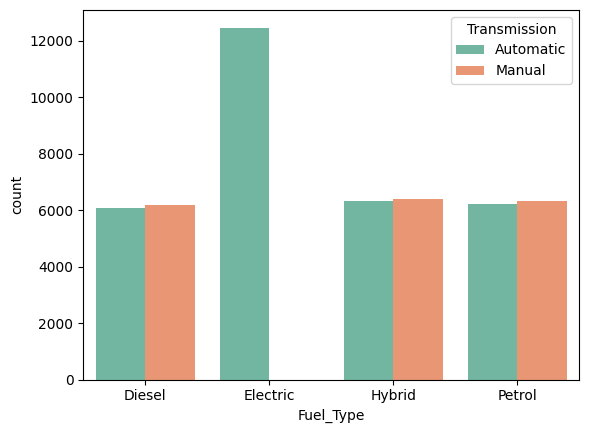

In [60]:
sns.barplot(x='Fuel_Type', y='count', hue='Transmission', data=f_t, palette='Set2')

Observation:

Electric vehicles have the highest Sales.

In [66]:
# Lets check excatly from which Year did the Electric Car sales took of for BMW

ev_years = df.groupby(['Year', 'Fuel_Type']).size().reset_index().rename(columns={0:'count'})

ev_years.head()

,Year,Fuel_Type,count
0,2010,Diesel,829
1,2010,Electric,837
2,2010,Hybrid,826
3,2010,Petrol,838
4,2011,Diesel,791


<Axes: xlabel='Year', ylabel='count'>

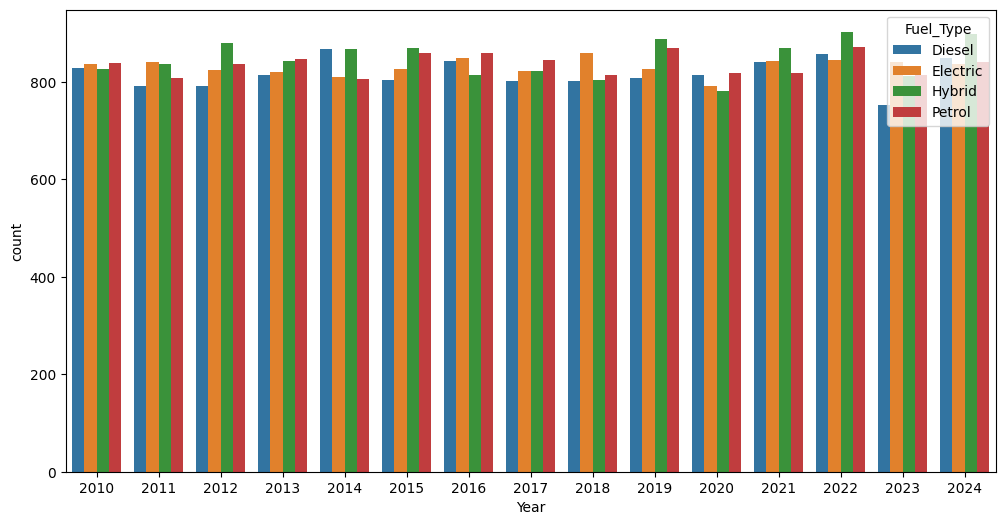

In [72]:


matplotlib.rcParams['figure.figsize'] = (12,6)

sns.barplot(x='Year', y='count', data=ev_years, hue='Fuel_Type' )

Observations:

From 2012 almost every year EV's have led in Sales.

<Axes: xlabel='count', ylabel='Model'>

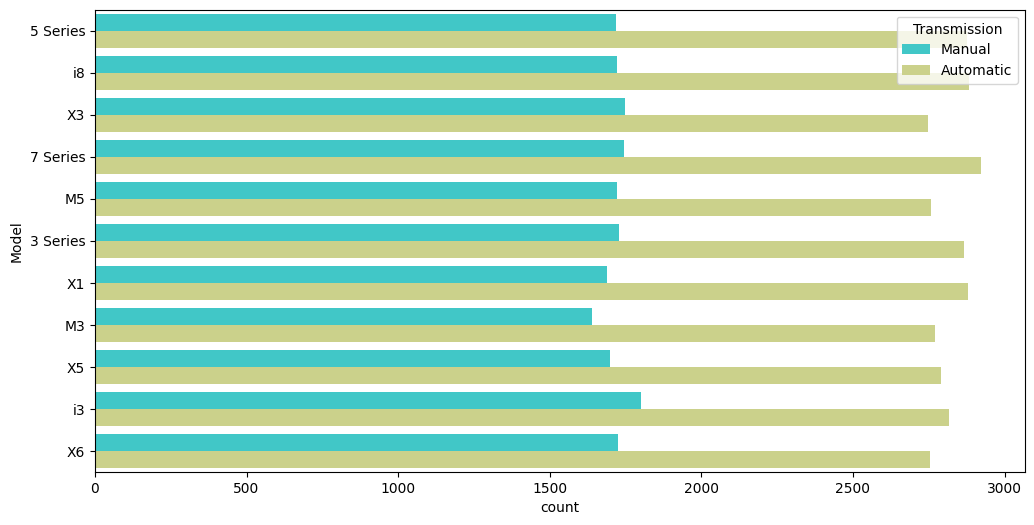

In [79]:
# Lets Check which Model have highest Sales

sns.countplot(y='Model', data=df, hue='Transmission', palette='rainbow')

Observation:

From above chart we can see that number of `Car Enthusiast` have gone down!!
IYKYK!!